# Livrable 1 : Classification binaire 
Mauvais groupe : Tabard Guillaume ,  Thery Loan, Badaoui Carl

## Contexte

Le projet consiste à développer une solution de classification binaire pour l'entreprise TouNum, spécialisée dans la numérisation de documents. L'objectif est de trier automatiquement des images en deux catégories : photos et autres types d'images (schémas, peintures, textes scannés, etc.). La solution sera basée sur des réseaux de neurones implémentés avec TensorFlow, et devra être capable de filtrer les photos pour un traitement ultérieur. Le modèle devra être rigoureusement évalué et optimisé en fonction du compromis biais/variance.

Le but de ce travail est de classifier automatiquement des images de tabards en fonction du nom du personnage qui porte le tabard.

# 1-Importation des bibliothèques

Dans cette section, nous allons importer les différentes librairies nécessaires pour le projet de classification d'images.

## Bibliothèques pour la manipulation des données et visualisation

- **matplotlib.pyplot** : Permet de créer des graphiques et des courbes pour visualiser les résultats, comme l'évolution de l'accuracy et de la perte pendant l'entraînement.
- **numpy** : Fournit des outils puissants pour la manipulation et le traitement des tableaux numériques, souvent utilisés pour des opérations sur des matrices.

## Bibliothèques pour la gestion des fichiers et images

- **os** : Utilisé pour naviguer et interagir avec le système de fichiers, notamment pour accéder aux datasets et organiser les fichiers.
- **PIL (Pillow)** : Librairie spécialisée dans la manipulation des images en Python.
- **pathlib** : Fournit des outils pratiques pour gérer les chemins de fichiers et dossiers de manière portable.
- **zipfile** : Permet de manipuler des fichiers compressés, utile pour extraire les datasets volumineux.
- **shutil** : Utilisée pour copier, déplacer ou gérer des fichiers et dossiers.

## Bibliothèques pour le machine learning et les réseaux de neurones

- **tensorflow** : Framework de machine learning qui facilite la création, l'entraînement et l'évaluation de réseaux de neurones.
- **keras** : API haut niveau intégrée à TensorFlow qui permet de créer des modèles de réseaux de neurones facilement.

## Couches de prétraitement d'image

- **RandomFlip, RandomRotation, RandomZoom** : Couches de transformation aléatoire appliquées aux images pour augmenter la diversité des données d'entraînement. Cela aide à rendre le modèle plus robuste en le confrontant à différentes variations des images.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import zipfile
from tensorflow import keras
import shutil


from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Correct imports for image preprocessing layers
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom


# 2-Préparation des images
#### Dézip des fichiers

Nous commençons par vérifier si le dossier de destination pour les données décompressées existe, sinon nous le créons. Ensuite, nous parcourons le répertoire contenant les fichiers ZIP et décompressons chaque fichier dans le dossier spécifié.


In [2]:
repertoire = 'C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\Data1'
dossier_dataset = 'C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\Data'
train_dir = 'C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\train'
validation_dir = 'C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\validation'

In [7]:
# Vérifier si le dossier de destination existe, sinon le créer
if not os.path.exists(dossier_dataset):
    os.makedirs(dossier_dataset)

# Extraire les fichiers ZIP dans le dossier de données
for fichier in os.listdir(repertoire):
    chemin_fichier = os.path.join(repertoire, fichier)  # Combiner le répertoire et le nom du fichier
    if zipfile.is_zipfile(chemin_fichier):  # Vérifier si le fichier est un zip
        with zipfile.ZipFile(chemin_fichier, 'r') as zip_ref:
            zip_ref.extractall(dossier_dataset)  # Extraire le contenu du zip dans le dossier cible
            print(f'Fichier {fichier} décompressé dans le dossier Dataset.')
            
print('Tous les fichiers ZIP ont été décompressés dans le dossier Dataset')

Fichier Dataset Livrable 1 - Painting.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Photo.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Schematics.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Sketch.zip décompressé dans le dossier Dataset.
Fichier Dataset Livrable 1 - Text.zip décompressé dans le dossier Dataset.
Tous les fichiers ZIP ont été décompressés dans le dossier Dataset


## Suppression des images corrompues

Nous vérifions ensuite si certaines images sont corrompues ou illisibles. En utilisant TensorFlow, nous tentons de charger et décoder chaque image. Si une image est invalide, elle est supprimée du dataset.



In [3]:
# Vérification des images avec TensorFlow
dataset_folder = dossier_dataset

In [10]:

print("Début de la vérification des images avec TensorFlow...")
for subdir, _, files in os.walk(dataset_folder):
    for file in files:
        file_path = os.path.join(subdir, file)
        try:
            # Tenter de charger et décoder l'image avec TensorFlow
            img = tf.io.read_file(file_path)
            img = tf.image.decode_image(img)
        except Exception as e:
            print(f"Image {file_path} is invalid for TensorFlow. Exception: {e}")
            try:
                os.remove(file_path)
                print(f"Removed: {file_path}")
            except Exception as e_rm:
                print(f"Error removing {file_path}. Exception: {e_rm}")

print("Vérification des images terminée.")

Début de la vérification des images avec TensorFlow...
Image C:\Users\Carl\Desktop\CESI\IA\livrable1\Data\Painting\painting_02662.jpg is invalid for TensorFlow. Exception: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: 
Removed: C:\Users\Carl\Desktop\CESI\IA\livrable1\Data\Painting\painting_02662.jpg
Image C:\Users\Carl\Desktop\CESI\IA\livrable1\Data\Schematics\desktop.ini is invalid for TensorFlow. Exception: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
Removed: C:\Users\Carl\Desktop\CESI\IA\livrable1\Data\Schematics\desktop.ini
Vérification des images terminée.


## Division des données en ensembles d'entraînement et de validation


Dans cette étape, nous créons les répertoires pour les ensembles d'entraînement (**train**) et de validation (**validation**). Ensuite, les images de chaque classe sont mélangées aléatoirement, puis 20 % d'entre elles sont attribuées à l'ensemble de validation, tandis que les 80 % restantes sont affectées à l'ensemble d'entraînement.


In [4]:
# Création des répertoires pour train et validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [5]:
# Liste des classes (dossiers)
classes = os.listdir(dataset_folder)

In [6]:
# Déplacer les fichiers vers train et validation
for class_name in classes:
    class_dir = os.path.join(dataset_folder, class_name)
    if os.path.isdir(class_dir):
        image_files = os.listdir(class_dir)
        np.random.shuffle(image_files)  # Mélanger les fichiers d'images
        
        # Définir le nombre d'images pour l'ensemble de validation (20%)
        num_validation = int(0.2 * len(image_files))
        
        # Créer les répertoires pour chaque classe
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)
        
        for i, image_file in enumerate(image_files):
            source_path = os.path.join(class_dir, image_file)
            if i < num_validation:
                # Déplacer vers validation
                shutil.move(source_path, os.path.join(validation_dir, class_name, image_file))
            else:
                # Déplacer vers train
                shutil.move(source_path, os.path.join(train_dir, class_name, image_file))

print("Données divisées entre entraînement et validation.")


Données divisées entre entraînement et validation.


### Pourquoi 20 % pour la validation et 80 % pour l'entraînement ?

- **Ensemble d'entraînement (80%)** : Utilisé pour ajuster les poids du modèle à travers les itérations. Plus de données permettent de mieux entraîner le modèle, réduisant ainsi le risque de sous-apprentissage.
- **Ensemble de validation (20%)** : Utilisé pour surveiller les performances du modèle pendant l'entraînement, détecter le sur-apprentissage (overfitting) et ajuster les hyperparamètres. Un ensemble de validation trop petit ne donnerait pas une bonne estimation des performances du modèle.

Cette approche garantit que le modèle est bien ajusté et capable de généraliser sur des données non vues.Le ratio 80/20 est une norme largement adoptée en machine learning, offrant un bon équilibre entre les données d'entraînement et de validation tout en permettant une évaluation efficace du modèle.



## Emplacement du dataset
Nous commençons par spécifier l'emplacement du dataset, ce qui nous permet de localiser facilement les données nécessaires pour l'apprentissage. Nous mettons en place la variable data_dir en utilisant la bibliothèque pathlib, qui offre une interface intuitive pour gérer les chemins de fichiers.



In [7]:
datapath = dossier_dataset
data_dir = pathlib.Path(datapath)   

### Création des Set
Pour commencer, on spécifie quelques paramètres pour l'apprentissage :
<ul>
    <li>Dimensions des images : Nous fixons la longueur et la largeur des images à 180 pixels, ce qui est une taille standard permettant de préserver une qualité d'image suffisante tout en réduisant le coût computationnel. </li>
    <li>Taille du batch : Nous choisissons une taille de batch de 32, ce qui signifie que lors de l'entraînement, le modèle traitera 32 images à la fois. Cela permet d'équilibrer l'utilisation de la mémoire et la vitesse d'entraînement.</li>
</ul>


In [8]:
image_h = 180
image_w = 180
batch_s = 32

In [9]:
# Le train_set
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,  # Changer ici pour le répertoire d'entraînement
    image_size=(image_h, image_w),
    batch_size=batch_s
)

# Le test_set
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,  # Changer ici pour le répertoire de validation
    image_size=(image_h, image_w),
    batch_size=batch_s
)
# Affichage du nombre d'images dans chaque ensemble
print(f"Nombre d'images d'entraînement : {len(train_set)}")
print(f"Nombre d'images de validation : {len(validation_set)}")


Found 39723 files belonging to 5 classes.
Found 14881 files belonging to 5 classes.
Nombre d'images d'entraînement : 1242
Nombre d'images de validation : 466


## Verifications des ensembles

Après la création des ensembles, nous affichons le nombre d'images présentes dans chacun d'eux, ce qui nous permet de confirmer que la répartition a été effectuée correctement.



In [10]:
class_names = train_set.class_names
print(class_names)

['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


# 3 - Coup d'œil sur nos données
On peut affichage une des images du set d'entraînements, aux dimensions spécifiées dans les paramètres :

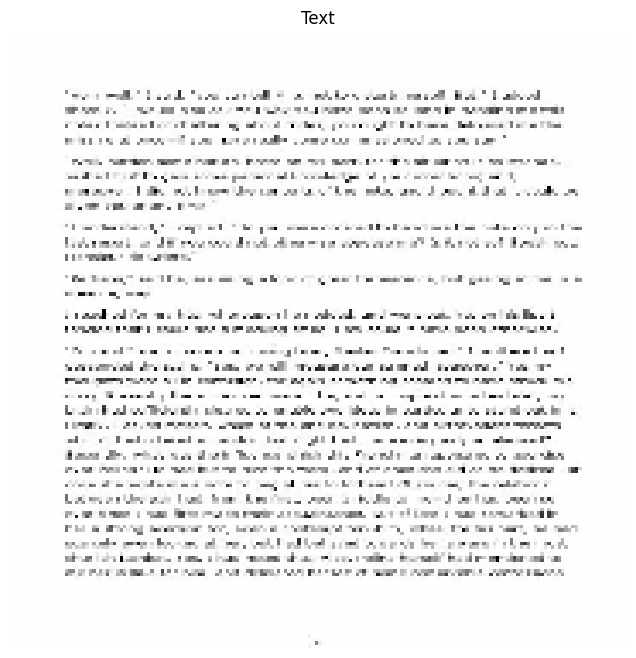

In [12]:
plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
        ax =  plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


# 3. Configuration de l'environnement pour l'entrainement
Dans cette partie, vous devrez utiliser les fonctions [`Dataset.cache`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache) et [`Dataset.prefetch`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) afin de configurer les données pour améliorer les performances de la façon suivante :
- `Dataset.cache()` : Cette fonction sert à forcer le maintien des données en cache dans la mémoire. Vu que le réseau de neurones fait plusieurs passes (qu'on nomme _époque_ ou _epoch_ en anglais) sur les données durant l'apprentissage, cette fonction permet de ne pas avoir à recharger les images à chaque fois. 
- `Dataset.prefetch()` : Cette fonction permet de faire le prétraitement de l'élément courant du jeu de données (par exemple le batch suivant) en même temps que l'entrainement/évaluation du batch courant par le modèle. Dans un environnement multi-processeurs ou multi-cœur, c'est un gain de temps non négligeable.

In [13]:
# AUTOTUNE permet de définir automatiquement le nombre optimal de threads pour le préchargement des données
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Configuration du train_set avec cache et prefetch pour améliorer les performances
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Configuration du test_set (ou validation_set) avec cache et prefetch
validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)

## Techniques de régularisation
Les techniques de régularisation sont les techniques qui visent à réduire le surapprentissage. L’objectif est d’éviter que le réseau de neurones mémorise le jeu de données en s’ajustant bêtement sur les particularités du jeu d’entrainement. Il s’agit globalement de réduire les degrés de liberté du réseau de neurones.

Les techniques de régularisation sont les techniques qui visent à réduire le surapprentissage. L’objectif est d’éviter que le réseau de neurones mémorise le jeu de données en s’ajustant bêtement sur les particularités du jeu d’entrainement. Il s’agit globalement de réduire les degrés de liberté du réseau de neurones. Dans le cadre de ce wokrshop nous verrons deux techniques de régularisation :
-	**L’augmentation des données** : Avoir plus de données est toujours bon pour réduire le surapprentissage, d’où l’augmentation des données. Le principe et de rajouter de nouvelles images en effectuant des transformations sur le jeu d’entrainement d’origine. Ces nouvelles images sont obtenues par des transformation affines, ou généralement par des transformations réalistes qui ne change pas la nature du label affectée à l’image. Cette technique est très efficace car les réseaux de neurones sont très gourmands en données.
-	**La technique de dropout** : Cette technique consiste à désactiver, à chaque traitement, les neurones d’une couche dense du réseau de manière aléatoire. Le dropout dépend d’un paramètre qui représente la probabilité de désactivation des neurones de la couche. Cette probabilité est le la proportion moyenne de neurones actives dans la couche durant les itérations de l’entrainement. Elle permet de réduire la complexité du réseau de neurones pour réduire le surapprentissage.

In [14]:
data_augmentation = Sequential(
    [
        RandomFlip(
            mode="horizontal_and_vertical",  # Correct string value
            input_shape=(image_h, image_w, 3)),
        RandomRotation(
            factor=0.18,
            fill_mode='reflect',
            interpolation='bilinear',
            seed=None,
            fill_value=0.0),
        RandomZoom(
            height_factor=0.1,
            width_factor=None,
            fill_mode='reflect',
            interpolation='bilinear',
            seed=None,
            fill_value=0.0)
    ]
)

C:\Users\Carl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 4. Le Modèle


In [15]:
num_classes = 5 # Nombre de classes et donc aussi nombre de neurones dans la dernière couche
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=1,restore_best_weights=True)

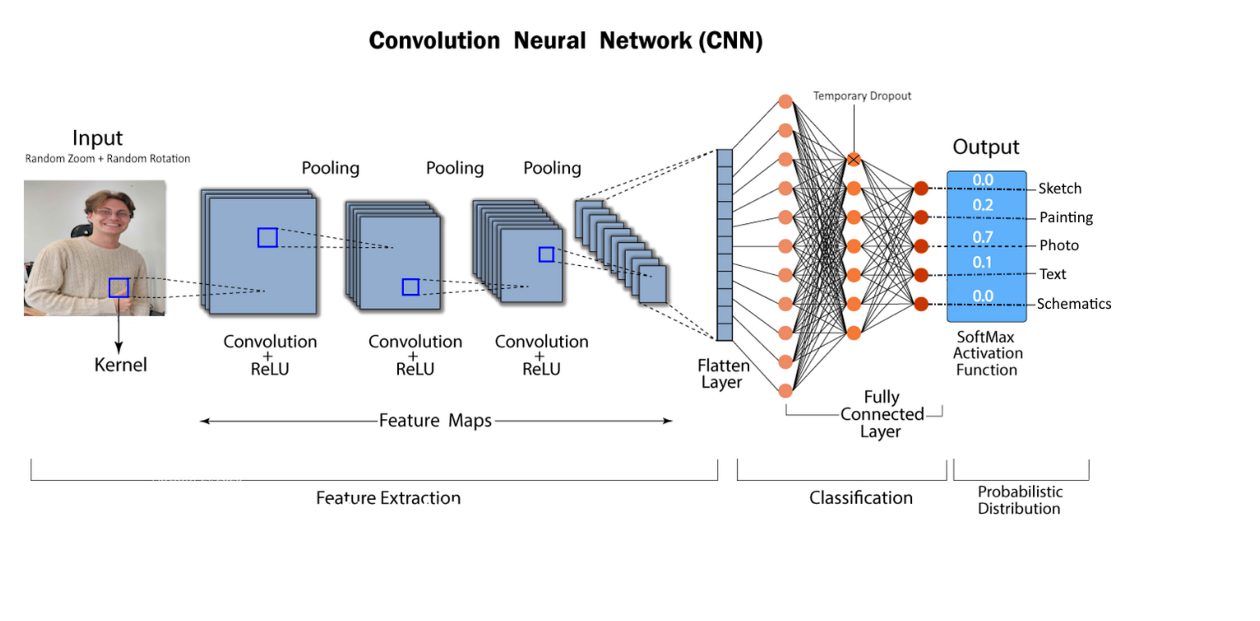

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
# Chemin vers ton image
image_path = r"C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\ourmodel.png"

# Charger l'image
img = Image.open(image_path)

plt.figure(figsize=(16, 12))  

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Optionnel : pour cacher les axes
plt.show()

## Modèle de Réseau de Neurones Convolutifs (CNN)

Le modèle est conçu pour classer les images en cinq catégories différentes. Chaque couche du modèle joue un rôle essentiel dans l'extraction des caractéristiques pertinentes pour cette tâche.



### Modèle de Reconnaissance d'Images

#### 1. Couche de Rescaling
- **Description** : Cette couche normalise les valeurs des pixels en les divisant par 255.
- **Utilité** : Elle met à l'échelle les valeurs des pixels entre 0 et 1, ce qui aide à améliorer la convergence du modèle.
```python 
layers.Rescaling(1./255, input_shape=(image_h, image_w, 3))
```

#### 2. Première Couche de Convolution (Conv2D)
- **Description** : Cette couche applique 32 filtres de convolution de taille \(3 \times 3\) avec une activation ReLU.
- **Utilité** : Elle détecte des caractéristiques de bas niveau, comme des bords et des textures, essentielles pour distinguer les photos des peintures ou des esquisses.
```python 
layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
```


#### 3. Couche de Max Pooling (MaxPooling2D)
- **Description** : Cette couche réduit la dimensionnalité de l'image en prenant le maximum d'une fenêtre de \(2 \times 2\).
- **Utilité** : Elle diminue la taille des caractéristiques tout en conservant les informations les plus importantes, ce qui aide à réduire le temps d'entraînement et à prévenir le surapprentissage.
```python 
layers.MaxPooling2D((2, 2)),
```

#### 4. Deuxième Couche de Convolution (Conv2D)
- **Description** : Cette couche applique 64 filtres de convolution de taille \(3 \times 3\) avec une activation ReLU.
- **Utilité** : Elle permet de détecter des caractéristiques plus complexes à partir des caractéristiques extraites par la première couche.
```python 
layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
```

#### 5. Deuxième Couche de Max Pooling (MaxPooling2D)
- **Description** : Comme précédemment, cette couche réduit la dimensionnalité des caractéristiques extraites.
- **Utilité** : Cela aide à concentrer les informations tout en réduisant la complexité du modèle.
```python 
layers.MaxPooling2D((2, 2)),
```

#### 6. Troisième Couche de Convolution (Conv2D)
- **Description** : Cette couche applique 128 filtres de convolution de taille \(3 \times 3\) avec une activation ReLU.
- **Utilité** : Elle extrait des caractéristiques encore plus abstraites et complexes, permettant une meilleure différenciation entre les types d'images.
```python 
layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
```

#### 7. Troisième Couche de Max Pooling (MaxPooling2D)
- **Description** : Cette couche réduit à nouveau la dimensionnalité des caractéristiques extraites.
- **Utilité** : Cela continue à concentrer les informations pertinentes tout en diminuant la taille des données traitées.
```python 
layers.MaxPooling2D((2, 2)),
```

#### 8. Quatrième Couche de Convolution (Conv2D)
- **Description** : Cette couche applique 256 filtres de convolution de taille \(3 \times 3\) avec une activation ReLU.
- **Utilité** : Elle permet d'extraire des caractéristiques encore plus riches, augmentant la capacité du modèle à différencier les photos, peintures, esquisses et textes.
```python 
layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
```

#### 9. Quatrième Couche de Max Pooling (MaxPooling2D)
- **Description** : Réduction supplémentaire de la dimensionnalité.
- **Utilité** : Facilite le traitement en préservant les caractéristiques essentielles tout en réduisant la charge computationnelle.
```python 
layers.MaxPooling2D((2, 2)),
```

#### 10. Couche de Dropout
- **Description** : Cette couche désactive 30% des neurones pendant l'entraînement.
- **Utilité** : Elle aide à prévenir le surapprentissage en empêchant le modèle de devenir trop dépendant de certaines caractéristiques.
```python 
layers.Dropout(0.3),
```

#### 11. Couche de Flatten
- **Description** : Transforme les caractéristiques en un vecteur 1D.
- **Utilité** : Cela prépare les données pour la couche dense suivante.
```python 
layers.Flatten(),
```

#### 12. Couche Dense (256 neurones)
- **Description** : Cette couche entièrement connectée possède 256 neurones avec activation ReLU.
- **Utilité** : Elle combine les caractéristiques extraites pour apprendre des relations complexes et prend des décisions finales sur la classification.
```python 
layers.Dense(256, activation='relu'),
```

#### 13. Couche de Dropout
- **Description** : Désactive 50% des neurones pendant l'entraînement.
- **Utilité** : Cela aide à éviter le surapprentissage, en renforçant la généralisation du modèle.
```python 
layers.Dropout(0.5),
```

#### 14. Couche de Sortie (Dense)
- **Description** : Cette couche a un nombre de neurones égal au nombre de classes (5) avec une activation softmax.
- **Utilité** : Elle fournit la probabilité que l'image appartienne à chaque classe (photo, peinture, esquisse, texte, etc.).
```python 
layers.Dense(num_classes, activation="softmax")
```


### Compilation et Entraînement
- **Optimiseur** : Utilisation de l'optimiseur Adam avec un taux d'apprentissage adaptatif, qui ajuste le taux en fonction de l'ampleur des gradients, ce qui peut améliorer la convergence du modèle.
- **Fonction de perte** : La perte est calculée avec l'entropie croisée, appropriée pour la classification multi-classes.
- **Métriques** : Nous suivons l'accuracy pour évaluer les performances du modèle pendant l'entraînement.
```python 
complete_model2.compile(optimizer=optimizer,
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Mise à jour ici pour softmax
                        metrics=['accuracy'])
```

### Résumé du Modèle
Chaque couche du modèle est soigneusement choisie pour contribuer à l'apprentissage des caractéristiques pertinentes permettant de distinguer entre les différentes catégories d'images. Grâce à l'utilisation de couches de convolution, de pooling, et de dropout, le modèle est capable d'apprendre des représentations complexes, rendant ainsi le système robuste et efficace pour la classification d'images.


In [16]:
# Le modèle
epochs = 20
complete_model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(image_h, image_w, 3)),
    
    # Première couche de convolution
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Deuxième couche de convolution
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Troisième couche de convolution
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    # Nouvelle couche de convolution ajoutée
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # Couche ajoutée
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")  # 5 dans notre cas
])

complete_model2.build((None, image_h, image_w, 3))

# Compilation du modèle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # On utilise un taux d'apprentissage adaptatif 
complete_model2.compile(optimizer=optimizer,
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Mise à jour ici pour softmax
                        metrics=['accuracy'])

# Résumé du modèle
complete_model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,930,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,319,813 (31.74 MB)

 Trainable params: 8,319,813 (31.74 MB)

 Non-trainable params: 0 (0.00 B)

### Pourquoi les CNN sont adaptés à notre cas

**Extraction automatique de caractéristiques** :  
Contrairement aux méthodes classiques de vision par ordinateur, les CNN n'ont pas besoin de caractéristiques manuelles. Ils apprennent automatiquement à détecter des motifs pertinents dans les images (comme des textures, des formes ou des bords), ce qui est essentiel pour différencier des styles artistiques variés (photos, peintures, etc.).

**Robustesse face à la complexité visuelle** :  
Les photos, peintures et esquisses ont des caractéristiques visuelles très différentes. Les CNN, en appliquant plusieurs couches de convolution et de pooling, sont capables de capturer des détails fins à différentes échelles, rendant la distinction entre ces catégories plus précise.

**Hiérarchisation des caractéristiques** :  
Les CNN fonctionnent en plusieurs couches, où les premières couches détectent des motifs de bas niveau (comme les bords ou les textures), tandis que les couches plus profondes capturent des motifs plus complexes. Cette capacité hiérarchique est cruciale pour comprendre les différences entre des images simples (comme du texte) et des images plus complexes (comme des peintures ou des photos).

**Preuve empirique de succès** :  
Les CNN ont démontré des performances exceptionnelles dans de nombreuses études sur la classification d'images artistiques. Par exemple, une étude a montré que les CNN surpassaient les autres méthodes pour classer des œuvres d'art en fonction de leur style ou de leur auteur. De plus, dans les tâches de reconnaissance de scènes complexes, les CNN se sont avérés beaucoup plus performants grâce à leur architecture adaptable aux données visuelles.


## Entrainement du modele

L'entraînement d'un modèle de machine learning consiste à ajuster les paramètres pour améliorer la précision des prédictions. Voici les étapes clés du processus :

1. **Préparation des données** : Les données sont divisées en ensembles d'entraînement et de validation.

2. **Propagation avant** : Les images de l'ensemble d'entraînement passent dans le modèle, produisant des prédictions.

3. **Calcul de la perte** : La fonction de perte, comme l'entropie croisée, évalue la différence entre les prédictions et la vérité réelle.

4. **Propagation arrière** : Les poids du modèle sont ajustés à l'aide des gradients dérivés de la perte, souvent avec un optimiseur comme Adam.

5. **Évaluation et ajustement** : Le modèle est évalué sur l'ensemble de validation pour vérifier ses performances, avec des techniques comme l'early stopping pour prévenir le surapprentissage.

6. **Répétition** : Les étapes sont répétées pour un certain nombre d'epochs jusqu'à atteindre une précision satisfaisante.

L'entraînement permet au modèle de reconnaître des motifs dans les données, et est un processus itératif nécessitant une gestion attentive des données et des hyperparamètres.


In [17]:

# Entrainement du modèle
modele2 = complete_model2.fit(
    train_set,
    validation_data=validation_set,
    epochs=epochs,
    callbacks=[callback]  # callback (ex. EarlyStopping si nécessaire)
)

Epoch 1/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 646s 491ms/step - accuracy: 0.6472 - loss: 0.7964 - val_accuracy: 0.8497 - val_loss: 0.3607
Epoch 2/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 593s 477ms/step - accuracy: 0.8541 - loss: 0.3646 - val_accuracy: 0.8716 - val_loss: 0.3065
Epoch 3/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 606s 488ms/step - accuracy: 0.8874 - loss: 0.2881 - val_accuracy: 0.9183 - val_loss: 0.2082
Epoch 4/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 588s 474ms/step - accuracy: 0.9046 - loss: 0.2462 - val_accuracy: 0.9278 - val_loss: 0.1915
Epoch 5/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 576s 464ms/step - accuracy: 0.9162 - loss: 0.2140 - val_accuracy: 0.9360 - val_loss: 0.1682
Epoch 6/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 577s 465ms/step - accuracy: 0.9255 - loss: 0.1950 - val_accuracy: 0.9436 - val_loss: 0.1473
Epoch 7/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 576s 464ms/step - accuracy: 0.9349 - loss: 0.1737 - val_accuracy: 0.9536 - val_loss: 0.1276
Epoch 8/20
1242/1242 ━━━━━━━━━━━━━━━━━━━━ 573s 461ms/step - ac

# Visualisation de l'Accuracy et de la Loss

Dans cette section, nous récupérons et visualisons les métriques de performance du modèle au cours de l'entraînement. Les graphiques nous permettent de suivre l'évolution de l'accuracy et de la loss, tant pour l'ensemble d'entraînement que pour l'ensemble de validation.

### Description des Métriques

1. **Accuracy (Précision)** :
   - L'accuracy est la proportion de prédictions correctes effectuées par le modèle. Elle est calculée à chaque époque pour les ensembles d'entraînement et de validation.
   - Une accuracy élevée indique que le modèle fait bien des prédictions sur les données.

2. **Loss (Perte)** :
   - La loss mesure l'erreur entre les prédictions du modèle et les vraies étiquettes. Elle indique à quel point le modèle se trompe dans ses prédictions.
   - Une loss plus faible signifie que le modèle s'ajuste mieux aux données. L'objectif est de minimiser cette valeur au fil des epochs.

### Graphiques
- **Graphique de l'Accuracy** : Affiche la précision du modèle au cours des epochs. Nous voulons voir une augmentation continue de l'accuracy sur les deux ensembles.
- **Graphique de la Loss** : Montre la perte au cours des epochs. Nous espérons voir une diminution continue de la loss pour les deux ensembles, ce qui indique que le modèle apprend correctement.

Ces visualisations sont essentielles pour évaluer si le modèle apprend efficacement et pour détecter des problèmes tels que le surapprentissage.


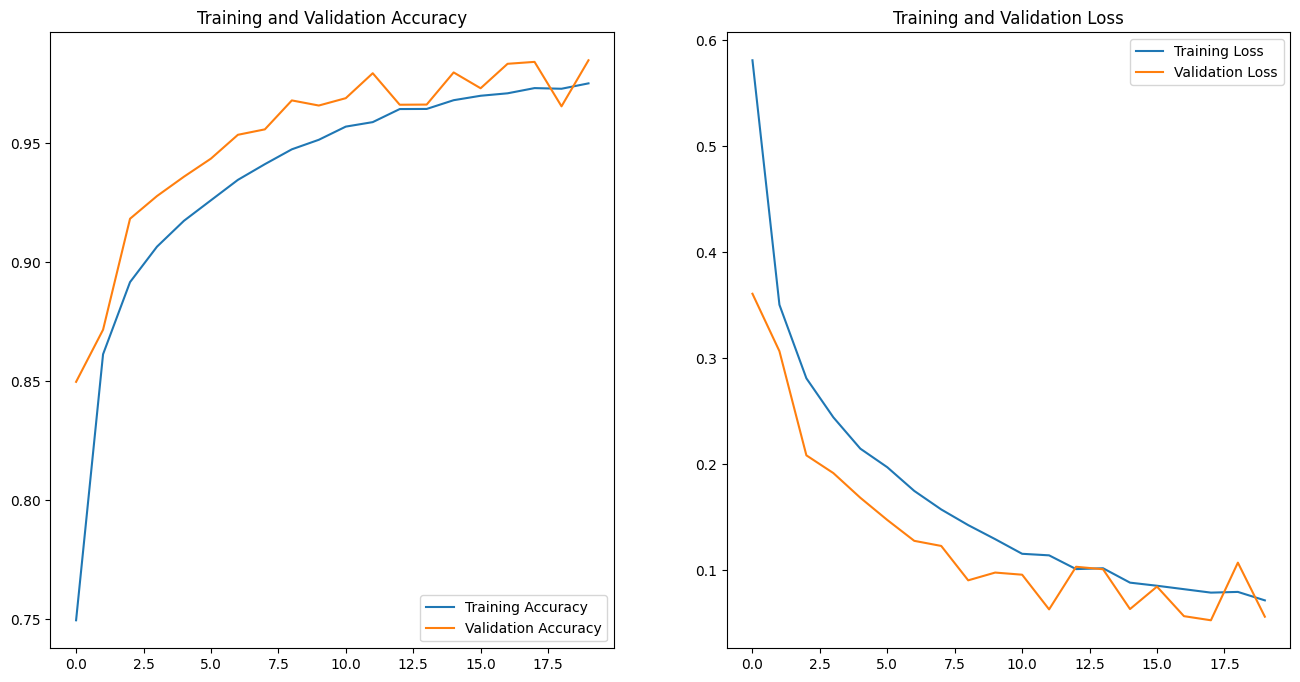

In [18]:
# Récupérer les valeurs d'accuracy et de loss
acc = modele2.history['accuracy']
val_acc = modele2.history['val_accuracy']

loss = modele2.history['loss']
val_loss = modele2.history['val_loss']

# Utiliser la longueur réelle des données pour epochs_range
epochs_range = range(len(acc))  # Ajustement ici

# Créer la figure pour les graphiques
plt.figure(figsize=(16, 8))

# Tracer l'accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Tracer la loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Afficher les graphiques
plt.show()


In [28]:
# Sauvegarder le modèle au format .keras (ou .h5)
complete_model2.save('C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\modele2.keras')


# Interprétation des résultats du modèle

Les graphiques montrent deux courbes importantes pour l’évaluation des performances de notre modèle : **l'accuracy** et **la loss**, tant pour l'entraînement que pour la validation.

#### 1. **Accuracy (Précision)**
- Sur le graphique de gauche, la courbe bleue représente l'accuracy pendant l'entraînement, et la courbe orange représente l'accuracy pendant la validation.
- L'accuracy de l'entraînement démarre autour de 0.75 et atteint presque 0.97 après plusieurs itérations (époques).
- L'accuracy de la validation progresse rapidement au début et oscille légèrement au-dessus de celle de l'entraînement, atteignant une valeur finale autour de 0.96.

Cette amélioration progressive de l'accuracy sur les deux ensembles montre que le modèle apprend bien et qu'il généralise correctement. La courbe d'accuracy de validation est très proche de celle de l'entraînement, ce qui indique **qu'il n'y a pas de surapprentissage** (overfitting). En effet, l'accuracy de validation est stable et suit bien celle de l'entraînement, un signe que le modèle peut bien généraliser à de nouvelles données.

#### 2. **Loss (Erreur)**
- Sur le graphique de droite, la courbe bleue représente la perte (loss) pendant l'entraînement, et la courbe orange représente la perte pendant la validation.
- On observe une diminution rapide de la loss pour les deux ensembles au début de l'entraînement, passant de 0.6 à environ 0.1 pour l'entraînement et 0.15 pour la validation après quelques époques.

La diminution régulière de la loss indique que le modèle améliore ses prédictions au fur et à mesure de l'entraînement. Le fait que la loss de validation reste proche de la loss d'entraînement montre encore une fois que le modèle généralise bien et ne souffre pas de surapprentissage. À la fin, les valeurs de loss sont très basses, ce qui est un bon indicateur de la précision des prédictions du modèle.

### Pourquoi il n'y a pas d'overfitting ?

L'un des principaux indicateurs montrant qu'il n'y a pas d'overfitting est la proximité des courbes d'accuracy et de loss entre l'entraînement et la validation. Si le modèle souffrait d'overfitting, l'accuracy sur l'entraînement aurait continué à augmenter, tandis que celle de la validation aurait stagné ou même diminué. De même, la loss de validation aurait cessé de diminuer et aurait commencé à augmenter. Dans notre cas, les courbes suivent des trajectoires similaires, ce qui indique que le modèle généralise bien sur des données non vues.

### Méthodes mises en place pour éviter l'overfitting

Pour prévenir l'overfitting, plusieurs techniques ont été mises en œuvre dans notre modèle :

- **Dropout** : Nous avons utilisé une couche de dropout qui désactive aléatoirement une fraction des neurones pendant l'entraînement, ce qui empêche le modèle de s'adapter de manière excessive aux données d'entraînement et favorise la généralisation.
- **Early Stopping** (optionnel si utilisé) : Si utilisé, l'early stopping aurait permis de stopper l'entraînement lorsque les performances de validation cessent de s'améliorer, évitant ainsi un surentraînement.
- **Augmentation de données** : En appliquant des transformations sur les images d'entraînement (comme des rotations ou des inversions), nous avons augmenté artificiellement la taille de notre jeu de données, ce qui permet au modèle d'apprendre à partir d'une plus grande diversité de données.

Ces stratégies, combinées avec une architecture bien pensée, ont permis d'éviter l'overfitting et d'obtenir un modèle capable de bien généraliser sur des données inconnues.


### Conclusion

Les résultats présentés démontrent que notre modèle de classification basé sur un réseau de neurones convolutionnels (CNN) a bien appris à distinguer les différentes catégories d'images (photos, peintures, esquisses, texte). Les courbes d'accuracy et de loss montrent une progression continue sans surapprentissage, prouvant ainsi que le modèle est robuste et généralisable.

Le CNN a su extraire efficacement des caractéristiques visuelles pertinentes pour différencier les styles artistiques, validant ainsi notre approche. Ce modèle pourrait être utilisé pour des applications concrètes de classification d'images artistiques ou dans d'autres domaines de vision par ordinateur nécessitant la distinction entre des types d'images visuellement variés.


# TEST Unitaire 



In [12]:
import unittest
import tensorflow as tf
import numpy as np

class TestKerasModel(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Charger ou initialiser le modèle ici si nécessaire
        cls.model = tf.keras.models.load_model('C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\modele2.keras')
        cls.image_h, cls.image_w = 180, 180
        cls.num_classes = 5  # Vérifier que le modèle est bien configuré pour 5 classes

    
    def test_training_on_small_batch(self):
        """Test pour vérifier que l'entraînement fonctionne sur un petit batch."""
        # Créer des données d'entraînement factices
        fake_data = np.random.random((10, self.image_h, self.image_w, 3))
        fake_labels = np.random.randint(0, self.num_classes, 10)
        
        # Compiler le modèle
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        self.model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Tester l'entraînement
        history = self.model.fit(fake_data, fake_labels, epochs=2, verbose=0)
        self.assertGreater(history.history['accuracy'][-1], 0, "L'entraînement doit avoir une accuracy non nulle.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 2.405s

OK


# Difficultés Rencontrées


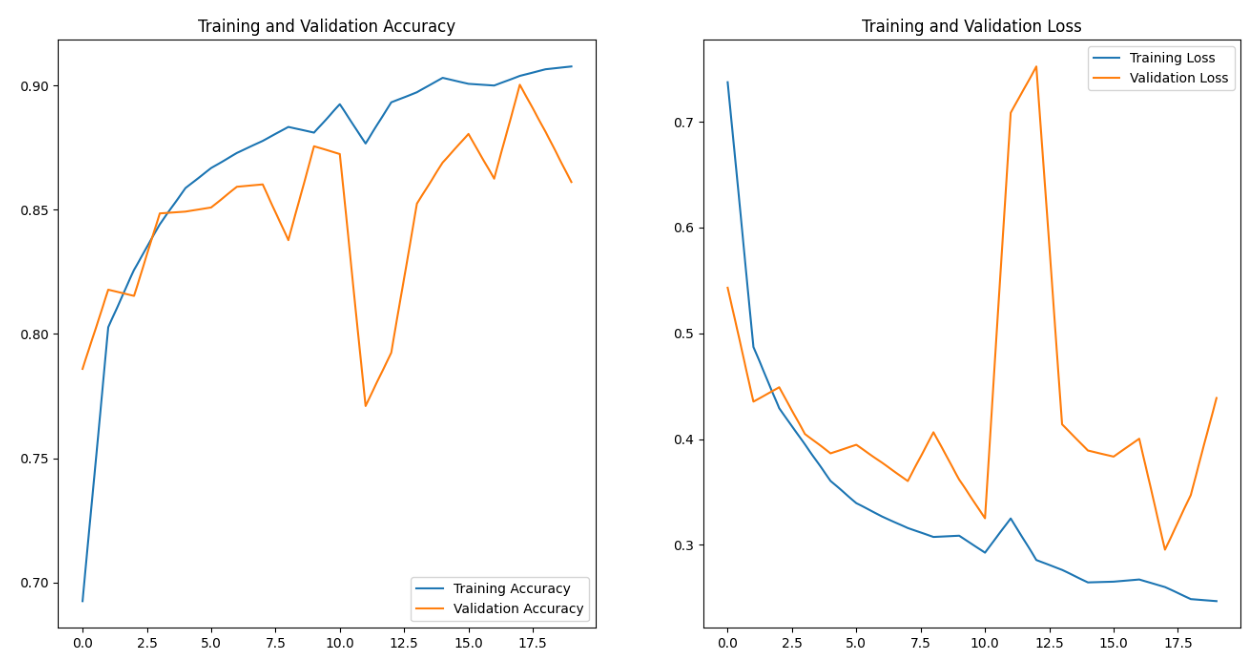

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
# Chemin vers ton image
image_path = r"C:\\Users\\Carl\\Desktop\\CESI\\IA\\livrable1\\modelbeta.png"

# Charger l'image
img = Image.open(image_path)

plt.figure(figsize=(16, 12))  

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Optionnel : pour cacher les axes
plt.show()


Au cours de l'entraînement de notre modèle, nous avons rencontré plusieurs difficultés. Au départ, nous avons utilisé trop de techniques pour éviter l'overfitting. En plus du dropout et de l'early stopping, nous avons également appliqué des augmentations de données comme le *random zoom* et la *random rotation*. Ces transformations visaient à rendre notre modèle plus robuste face à la variabilité des images.

Cependant, ces ajustements ont eu des conséquences sur nos courbes d'accuracy et de loss, comme illustré dans le graphique ci-dessous. Nous avons observé une oscillation des performances de validation, ce qui a compliqué l'évaluation de la capacité de généralisation de notre modèle. 


Avec le temps, nous avons affiné notre approche et réduit l'utilisation d'augmentations de données. Cela a permis d'obtenir des courbes plus stables et d'améliorer la performance générale du modèle, tout en maintenant une bonne généralisation sur des données non vues.


# Références

- Lecun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). "Gradient-based learning applied to document recognition". *Proceedings of the IEEE*.
- Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). "ImageNet classification with deep convolutional neural networks". *Advances in Neural Information Processing Systems*.
- Simonyan, K., & Zisserman, A. (2014). "Very deep convolutional networks for large-scale image recognition". *arXiv preprint arXiv:1409.1556*.
- Zeiler, M. D., & Fergus, R. (2014). "Visualizing and understanding convolutional networks". *European Conference on Computer Vision*.
- Saleh, B., & Elgammal, A. (2015). "Large-scale classification of fine-art paintings: Learning the right metric on the right feature". *arXiv preprint arXiv:1505.00855*.
- He, K., Zhang, X., Ren, S., & Sun, J. (2016). "Deep residual learning for image recognition". *Proceedings of the IEEE conference on computer vision and pattern recognition*.
